Name - Prashant Patil

WINE QUALITY

Date set link - https://archive.ics.uci.edu/ml/datasets/wine+quality

Data Description 

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)



Task - Predict Wine Quality 


Importing liabrary 

In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

Loading data ...

In [4]:
data = pd.read_csv('winequality-red.csv') 

Data Visualization

In [6]:
data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

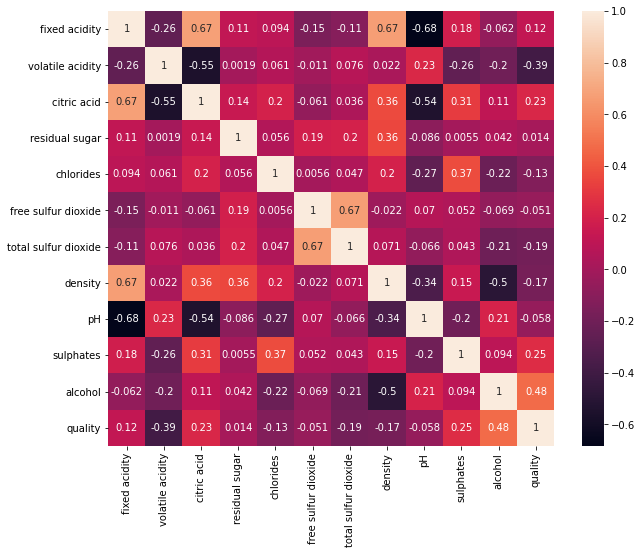

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr() , annot=True) 

Observation - alcohol, sulphates, citric acid, volatile acidity has good correlation with quality

In [17]:
data.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Data refining

In [44]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dividing Data

In [46]:
x = data.drop('quality',axis= 1)
y = data['quality'] 

In [47]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [48]:
y.head() 

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Normalizing 


In [49]:
nor = Normalizer()
x = nor.fit_transform(x) 

Data Splliting

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3) 

In [51]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape) 

(1119, 11)
(1119,)
(480, 11)
(480,)


Models

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
lgs = LogisticRegression()
dts = DecisionTreeClassifier()
rfs = RandomForestClassifier(n_estimators=1000)  

Training

In [54]:
knn.fit(xtrain,ytrain)
lgs.fit(xtrain,ytrain)
dts.fit(xtrain,ytrain)
rfs.fit(xtrain,ytrain) 

RandomForestClassifier(n_estimators=1000)

Prediction

In [55]:
knnp = knn.predict(xtest)
lgsp = lgs.predict(xtest)
dtsp = dts.predict(xtest)
rfsp = rfs.predict(xtest) 

Model Evaluation

In [57]:
knnacc = accuracy_score(ytest,knnp)
lgsacc = accuracy_score(ytest,lgsp)
dtsacc = accuracy_score(ytest,dtsp)
rfsacc = accuracy_score(ytest,rfsp) 

Time for Result

In [60]:
print("Model              : ","Accuracy Percentage") 
print("KNeighbors         : ",round(knnacc*100,2)) 
print("Logistic Regresion : ",round(knnacc*100,2)) 
print("Decision Tree      : ",round(knnacc*100,2)) 
print("Random Forest      : ",round(knnacc*100,2)) 

Model              :  Accuracy Percentage
KNeighbors         :  51.25
Logistic Regresion :  51.25
Decision Tree      :  51.25
Random Forest      :  51.25
